# VGG Transfer learning
Using VGG16 pre-trained on imagenet

## Data

In [6]:
from src.image_generator import generate_images
import matplotlib.pyplot as plt

In [2]:
data_generator = generate_images(object_types=[
        'ellipse',
        'checkerboard',
        'cube',
        'quad',
        #'star', # buggy
        'line',
        'triangle',
        'none'], 
    batch_size=32, 
    object_count=2, 
    display_mode=1,
    shape = (224,224))

In [3]:
x,y = next(data_generator)

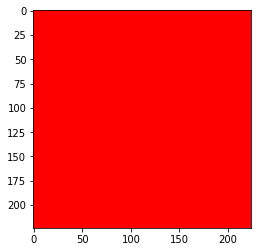

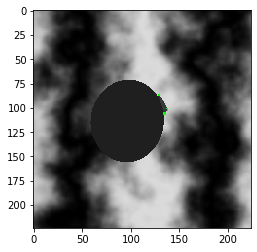

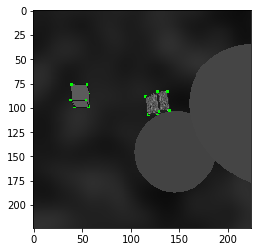

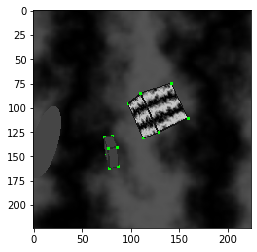

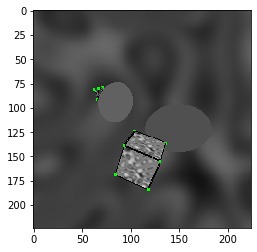

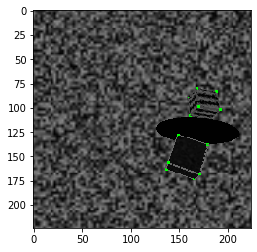

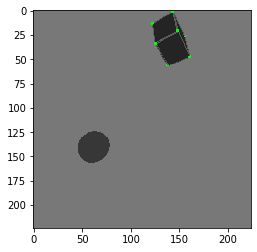

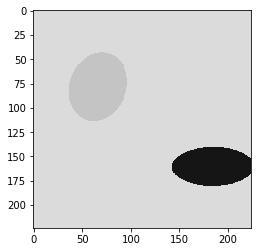

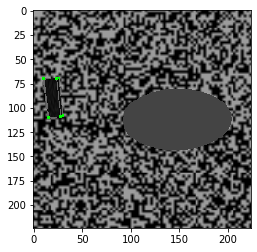

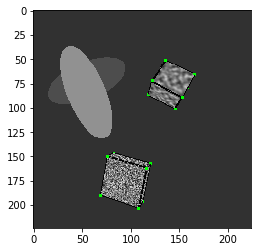

In [7]:
for ii in range(10):
    plt.imshow(x[ii])
    plt.show()

## Model

In [6]:
import keras
from keras.applications.vgg16 import VGG16
from keras.layers import Activation, Conv2D, Lambda, BatchNormalization
from keras.activations import softmax
import tensorflow as tf

### Setup

In [7]:
model = keras.models.Sequential()
model.add(VGG16(include_top=False,input_shape=(224,224,3),weights='imagenet'))
model.add(Conv2D(1024,1))
model.add(Activation(softmax))
model.add(BatchNormalization())
model.add(keras.layers.Lambda(lambda x: tf.nn.depth_to_space(x, block_size=32)))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 1024)        525312    
_________________________________________________________________
activation_1 (Activation)    (None, 7, 7, 1024)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 1024)        4096      
_________________________________________________________________
lambda_1 (Lambda)            (None, 224, 224, 1)       0         
Total params: 15,244,096
Trainable params: 15,242,048
Non-trainable params: 2,048
_________________________________________________________________


In [9]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Fit

In [10]:
model.fit(data_generator, steps_per_epoch=4,epochs=2)

Epoch 1/2
[INFO] rendering image 0/32


KeyboardInterrupt: 

### Evaluate

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x,y = next(data_generator)

In [ ]:
y_hat = model.predict(x)
y_hat = y_hat.astype(int)

In [ ]:
plt.imshow(y[0,:,:,0],cmap='gray');

In [ ]:
plt.imshow(y_hat[0,:,:,0],cmap='gray');